[Ссылка на отчет по проекту](https://drive.google.com/file/d/1JiMJrW22gVa74qqOpTlIws89udx7ZFNb/view?usp=sharing)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:


N = 100
process = np.random.normal(0, 0.5, N)

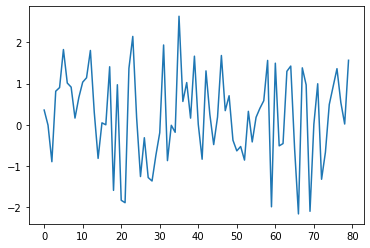

In [4]:
coef = np.random.normal(0,0.05,20)
first = np.random.normal(2,3,20)
values = []
for i in range(N):
    if i < 20:
        values.append(first[i])
    else:
        values.append(values[-20:]@coef + np.random.normal(0,1))
plt.plot(values[20:])

In [90]:
def RSS(true, pred):
    return sum((true - pred)**2)

def F_test(x_series, y_series, lag):
    
    features = np.array([y_series[i:lag+i] for i in range(N- lag)])
    X_train, X_test, y_train, y_test = train_test_split(features, y_series[lag:], train_size = 0.8, shuffle = False)
    reg = LinearRegression().fit(X_train, y_train)
    pred = reg.predict(X_test)
    rss_1 = RSS(y_test, pred)
    
    new_features = np.hstack((np.array([y_series[i:lag+i] for i in range(N- lag)]), np.array([x_series[i:lag+i] for i in range(N- lag)])))
    X_train, X_test, y_train, y_test = train_test_split(new_features, y_series[lag:], train_size = 0.8, shuffle=False)
    
    
    reg = LinearRegression().fit(X_train, y_train)

    pred = reg.predict(X_test)
    rss_2 = RSS(y_test, pred)
    rss_2
    
    return (rss_1-rss_2)/lag / (rss_2 / len(y_train))

def get_quality(x_series, y_series, lag):
    features = np.array([y_series[i:lag+i] for i in range(N- lag)])
    X_train, X_test, y_train, y_test = train_test_split(features, y_series[lag:], train_size = 0.8, shuffle = False)
    reg = LinearRegression().fit(X_train, y_train)
    pred = reg.predict(X_test)
    rss_1 = RSS(y_test, pred)
    
    new_features = np.hstack((np.array([y_series[i:lag+i] for i in range(N- lag)]), np.array([x_series[i:lag+i] for i in range(N- lag)])))
    X_train, X_test, y_train, y_test = train_test_split(new_features, y_series[lag:], train_size = 0.8, shuffle=False)
    
    
    reg = LinearRegression().fit(X_train, y_train)

    pred = reg.predict(X_test)
    rss_2 = RSS(y_test, pred)
    return rss_1, rss_2

In [94]:
first_pure_process = [0]
second_pure_process = [0]
built_process = [0]

lag = 5
coef = np.random.normal(0,0.05,lag)
first = [0]
for i in range(lag):
    first.append(np.random.normal(np.random.randint(5),2) + first[-1])

N = 100
second_first_pure_process = [0]
low_correlated_process_pure = [0]
highly_correlated_process_pure = [0]
highly_correlated_process_built = [0]
low_correlated_process_built = [0]
for i in range(N-1):
    first_pure_process.append(np.random.normal(first_pure_process[-1],2) - first_pure_process[-1])
    second_pure_process.append(np.random.normal(second_pure_process[-1],2) - second_pure_process[-1])
    if i < lag:
        built_process.append(first[i])
    else:
        built_process.append(values[-lag:]@coef + np.random.normal(0,0.3))
    low_correlated_process_pure.append(first_pure_process[-1] * 0.1 + np.random.normal(0, 3))
    highly_correlated_process_pure.append(first_pure_process[-1] * 1 + np.random.normal(1, 0.5))    
    highly_correlated_process_built.append(built_process[-1] * 1 + np.random.normal(1, 0.5))
    low_correlated_process_built.append(built_process[-1] * 0.1 + np.random.normal(0, 3)) 
low_pure = F_test(first_pure_process, low_correlated_process_pure,5)
high_pure = F_test(first_pure_process, highly_correlated_process_pure,5)
low_built = F_test(built_process, low_correlated_process_built,5)
high_built = F_test(built_process, highly_correlated_process_built,5)


plt.figure(figsize = (30,14))
plt.plot(first_pure_process, label='pure')
plt.plot(low_correlated_process_pure, label='low pure')
plt.plot(highly_correlated_process_pure, label='highly pure')
plt.plot(second_pure_process, label = 'second pure')
plt.plot(built_process, label='built')
plt.plot(low_correlated_process_built, label='low_built')
plt.plot(highly_correlated_process_built, label='highly_built')
plt.legend()
plt.xlabel('t')
plt.ylabel('W(t)')
plt.savefig('results.png')
plt.show()

 low pure 0.5338645529709024
 highly pure 3.683447115326674
 low built -0.8703838820916301
 highly built 6.254160361132051


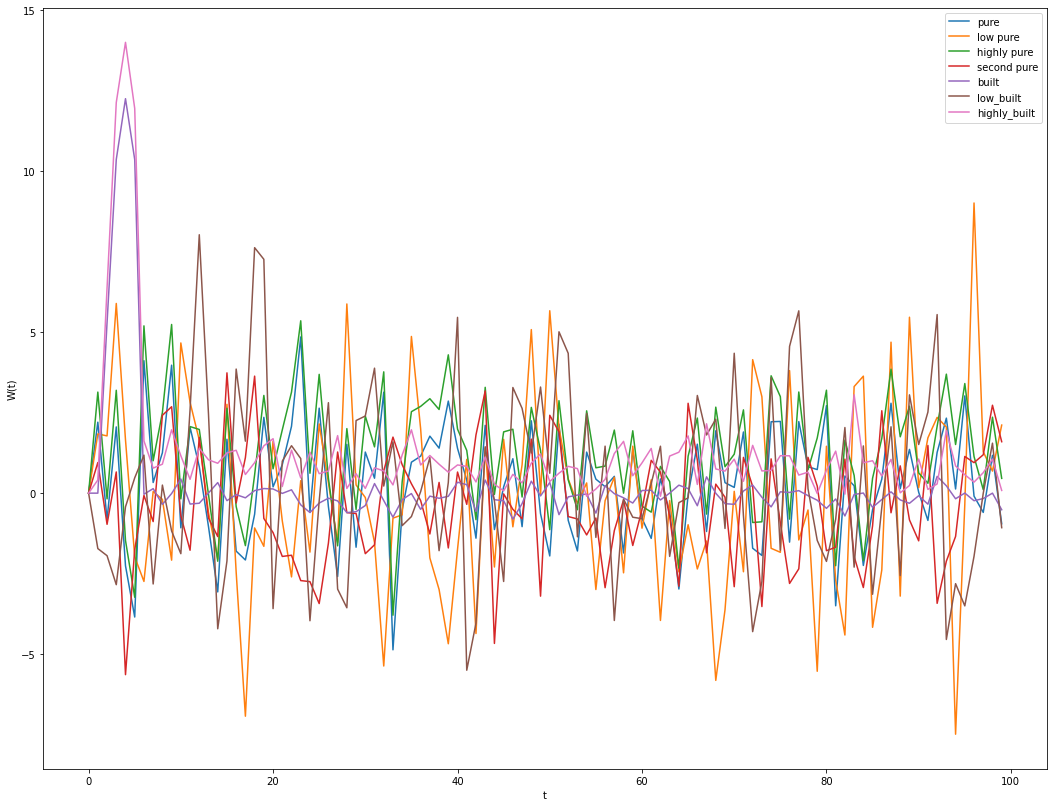

In [97]:
plt.figure(figsize = (18,14))
plt.plot(first_pure_process, label='pure')
plt.plot(low_correlated_process_pure, label='low pure')
plt.plot(highly_correlated_process_pure, label='highly pure')
plt.plot(second_pure_process, label = 'second pure')
plt.plot(built_process, label='built')
plt.plot(low_correlated_process_built, label='low_built')
plt.plot(highly_correlated_process_built, label='highly_built')
plt.legend()
plt.xlabel('t')
plt.ylabel('W(t)')
plt.savefig('results.png')
plt.show()

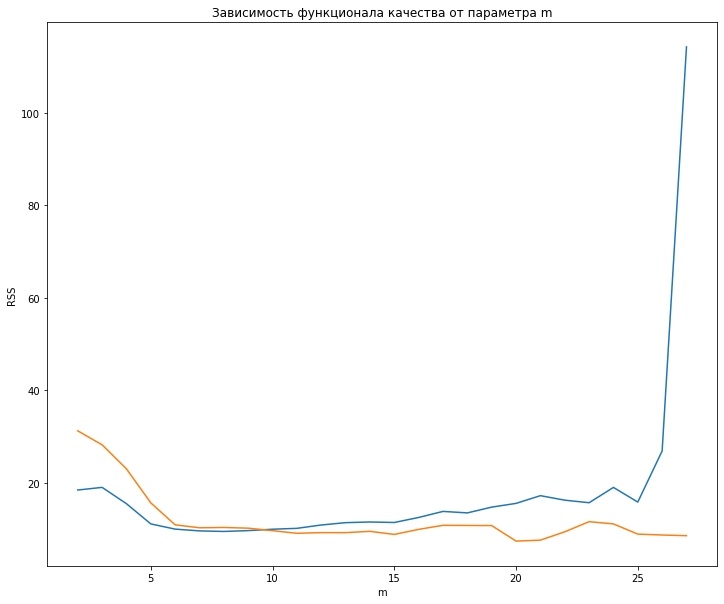

In [95]:
lags = np.arange(2,28,1)
qualities = [get_quality(built_process, highly_correlated_process_built, lag) for lag in lags]
plt.figure(figsize=(12, 10))
plt.plot(lags, [q[1] for q in qualities])
plt.plot(lags, [q[0] for q in qualities])
plt.title('Зависимость функционала качества от параметра m')
plt.xlabel('m')
plt.ylabel("RSS")
plt.savefig('m_dependency')
plt.show()

In [ ]:

print(f" low pure {F_test(pure_process, low_correlated_process_pure,5)}")
print(f" highly pure {F_test(pure_process, highly_correlated_process_pure,5)}")
print(f" low built {F_test(built_process, low_correlated_process_built,5)}")
print(f" highly built {F_test(built_process, highly_correlated_process_built,5)}")